# Final AGN project 
## Task 1 - Create BPT diagrams and classify AGN

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroquery.sdss import SDSS
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')

Since, we want to use the same classification for a lot of plots for easier comparison, this function classifies objects using the usual BPT plot with [OIII] and [NII] lines.

In [61]:
def cathegorise(data):
    data_agn = pd.concat([data[np.log10(data['[OIII] 5007 flux'] / data['Hbeta flux']) > 0.61 / (np.log10(data['[NII] 6583 flux'] / data['Halpha flux']) - 0.49) + 1.19],\
                      data[np.log10(data['[NII] 6583 flux'] / data['Halpha flux']) > 0.4]])
    data_comp = pd.concat([data[np.log10(data['[OIII] 5007 flux'] / data['Hbeta flux']) > 0.61 / (np.log10(data['[NII] 6583 flux'] / data['Halpha flux']) - 0.05) + 1.3],\
                      data[np.log10(data['[NII] 6583 flux'] / data['Halpha flux']) > 0.05]])
    data_comp = pd.concat([data_comp, data_agn])
    data_comp = data_comp.drop_duplicates(keep = False)

    data_sf = pd.concat([data, data_agn, data_comp])
    data_sf = data_sf.drop_duplicates(keep = False)
    
    return data_agn, data_sf, data_comp

A few functions to create different BPT diagrams and a WHAN diagram

In [62]:
def plot_bpt_OIII_NII(data, name = 'BPT_temp.png'):
    groups = cathegorise(data)
    x_sf = np.log10(groups[1]['[NII] 6583 flux'] / groups[1]['Halpha flux'])
    y_sf =np.log10(groups[1]['[OIII] 5007 flux'] / groups[1]['Hbeta flux'])

    x_agn = np.log10(groups[0]['[NII] 6583 flux'] / groups[0]['Halpha flux'])
    y_agn =np.log10(groups[0]['[OIII] 5007 flux'] / groups[0]['Hbeta flux'])

    x_comp = np.log10(groups[2]['[NII] 6583 flux'] / groups[2]['Halpha flux'])
    y_comp =np.log10(groups[2]['[OIII] 5007 flux'] / groups[2]['Hbeta flux'])
    
    x_eq_emp = np.linspace(-2, 0, 1000)
    x_eq_th = np.linspace(-2, 0.4, 1000)
    y_empeq = 0.61 / (x_eq_emp - 0.05) + 1.3
    y_theor = 0.61 / (x_eq_th - 0.49) + 1.19


    plt.plot(x_sf, y_sf, 'o', markersize=2, label = 'star-burst dominated')
    plt.plot(x_agn, y_agn, 'o', markersize=2, label = 'AGN dominated')
    plt.plot(x_comp, y_comp, 'o', markersize=2, label = 'Composite')
    plt.plot(x_eq_emp, y_empeq, '--')
    plt.plot(x_eq_th, y_theor, '--')
    plt.ylim(-1.5, 1.5)
    plt.xlim(-2, 0.6)  
    plt.xlabel(r'log([N II] $\lambda 6583$/ H$\alpha$)')
    plt.ylabel(r'log([O III] $\lambda 5007$/ H$\beta$)')
    plt.legend()
    plt.savefig(name, dpi = 300)
    plt.show()

In [63]:
def plot_bpt_OIII_OI(data, name = 'BPT_temp.png'):
    groups = cathegorise(data)
    
    x_sf = np.log10(groups[1]['[OI] 6300 flux'] / groups[1]['Halpha flux'])
    y_sf =np.log10(groups[1]['[OIII] 5007 flux'] / groups[1]['Hbeta flux'])

    x_agn = np.log10(groups[0]['[OI] 6300 flux'] / groups[0]['Halpha flux'])
    y_agn =np.log10(groups[0]['[OIII] 5007 flux'] / groups[0]['Hbeta flux'])

    x_comp = np.log10(groups[2]['[OI] 6300 flux'] / groups[2]['Halpha flux'])
    y_comp =np.log10(groups[2]['[OIII] 5007 flux'] / groups[2]['Hbeta flux'])
    
    x_eq_th = np.linspace(-3.5, -0.59, 1000)
    y_theor = 0.73 / (x_eq_th + 0.589) + 1.33


    plt.plot(x_sf, y_sf, 'o', markersize=2, label = 'star-burst dominated')
    plt.plot(x_agn, y_agn, 'o', markersize=2, label = 'AGN dominated')
    plt.plot(x_comp, y_comp, 'o', markersize=2, label = 'Composite')
    #plt.plot(x_eq_emp, y_empeq, '--')
    plt.plot(x_eq_th, y_theor, '--')
    plt.ylim(-1.5, 1.5)
    plt.xlim(-3.5, 0)  
    plt.xlabel(r'log([O I] $\lambda 6300$/ H$\alpha$)')
    plt.ylabel(r'log([O III] $\lambda 5007$/ H$\beta$)')
    plt.legend()
    plt.savefig(name, dpi = 300)
    plt.show()

In [64]:
def plot_bpt_OIII_SII(data, name = 'BPT_temp.png'):
    groups = cathegorise(data)
    
    x_sf = np.log10((groups[1]['[SII] 6717 flux'] + groups[1]['[SII] 6731 flux']) / groups[1]['Halpha flux'])
    y_sf =np.log10(groups[1]['[OIII] 5007 flux'] / groups[1]['Hbeta flux'])

    x_agn = np.log10((groups[0]['[SII] 6717 flux'] + groups[0]['[SII] 6731 flux']) / groups[0]['Halpha flux'])
    y_agn =np.log10(groups[0]['[OIII] 5007 flux'] / groups[0]['Hbeta flux'])
    
    x_comp = np.log10((groups[2]['[SII] 6717 flux'] + groups[2]['[SII] 6731 flux']) / groups[2]['Halpha flux'])
    y_comp =np.log10(groups[2]['[OIII] 5007 flux'] / groups[2]['Hbeta flux'])

    x_eq_th = np.linspace(-3, 0.32, 1000)
    y_theor = 0.72 / (x_eq_th -0.32) + 1.30


    plt.plot(x_sf, y_sf, 'o', markersize=2, label = 'star-burst dominated')
    plt.plot(x_agn, y_agn, 'o', markersize=2, label = 'AGN dominated')
    plt.plot(x_comp, y_comp, 'o', markersize=2, label = 'Composite')
    plt.plot(x_eq_th, y_theor, '--')
    plt.ylim(-1.5, 1.5)
    plt.xlim(-1.5, 0.5)  
    plt.xlabel(r'log([O I] $\lambda 6300$/ H$\alpha$)')
    plt.ylabel(r'log([S II] $\lambda\lambda 6717, 6731$/ H$\beta$)')
    plt.legend()
    plt.savefig(name, dpi = 300)
    plt.show()

In [65]:
def plot_WHAN(data, name = 'WHAN.png'):
    groups = cathegorise(data)
    
    x_sf = groups[1]['[NII] 6583 flux'] / groups[1]['Halpha flux']
    y_sf = np.abs(groups[1]['H alpha eqw'])

    x_agn = groups[0]['[NII] 6583 flux'] / groups[0]['Halpha flux']
    y_agn = np.abs(groups[0]['H alpha eqw'])

    x_comp = groups[2]['[NII] 6583 flux'] / groups[2]['Halpha flux']
    y_comp = np.abs(groups[2]['H alpha eqw'])

    y_s06 = np.linspace(10 ** -1.5, 10 ** 3.5,100)
    x_s06 = np.ones(100) * 10 ** -0.40
    
    x_k06 = np.linspace(10 ** -0.40, 10 ** 0.6, 100)
    y_k06 = np.ones(100) * 6
    
    plt.loglog(x_sf, y_sf, 'o', markersize=2, label = 'star-burst dominated')
    plt.loglog(x_agn, y_agn, 'o', markersize=2, label = 'AGN dominated')
    plt.loglog(x_comp, y_comp, 'o', markersize=2, label = 'Composite')
    plt.loglog(x_s06, y_s06, '--')
    plt.loglog(x_k06, y_k06, '--')
    plt.ylim(10 ** -1.5, 10 ** 3.5)
    plt.xlim(10 ** -2, 10** 0.6)  
    plt.xlabel(r'log([N II] $\lambda 6583$/ H$\alpha$)')
    plt.ylabel(r'log($W_{H\alpha}$)')
    plt.legend()
    plt.savefig(name, dpi = 300)
    plt.show()

In order to keep the sampe as unbiased as possible, no conditions on SNR have been imposed. To be able to compare effectivery results from BPT and WISE diagrams, all of the data is obtained through a single query. 

In [66]:
query = """SELECT TOP 30000
s.plate,s.mjd, s.fiberid,
g.h_alpha_eqw AS 'H alpha eqw',
g.h_alpha_eqw_err AS 'H aloha eqw err',
g.oiii_5007_flux AS '[OIII] 5007 flux',
g.oiii_5007_flux_err AS '[OIII] 5007 flux err',
g.h_beta_flux AS 'Hbeta flux',
g.h_beta_flux_err AS 'Hbeta flux err',
g.h_alpha_flux AS 'Halpha flux',
g.h_alpha_flux_err AS 'Halpha flux err',
g.nii_6584_flux AS '[NII] 6583 flux',
g.nii_6584_flux_err AS '[NII] 6583 flux err',
g.oi_6300_flux AS '[OI] 6300 flux',
g.oi_6300_flux_err AS '[OI] 6300 flux err',
g.sii_6717_flux AS '[SII] 6717 flux',
g.sii_6717_flux_err AS '[SII] 6717 flux err',
g.sii_6731_flux AS '[SII] 6731 flux',
g.sii_6731_flux_err AS '[SII] 6731 flux err',
s.z AS 'redshift', 
w.w1mag AS 'W1 mag', 
w.w2mag AS 'W2 mag', 
w.w3mag AS 'W3 mag'

FROM SpecObj AS s
JOIN GalSpecLine AS g ON
s.specobjid = g.specobjid
JOIN wise_xmatch AS x ON x.sdss_objid = s.bestobjid
JOIN wise_allsky AS w ON x.wise_cntr = w.cntr

WHERE
g.oiii_5007_flux > 5
AND g.h_beta_flux > 5
AND g.h_alpha_flux > 5
AND g.nii_6584_flux > 5
AND g.oiii_5007_flux > 5
AND g.oi_6300_flux > 5
AND g.sii_6717_flux > 5
AND g.sii_6731_flux > 5
AND g.oiii_5007_eqw < 0
AND g.h_beta_eqw < 0
AND g.h_alpha_eqw < 0
AND g.nii_6584_eqw < 0
AND g.oi_6300_eqw < 0
AND g.sii_6717_eqw < 0
AND g.sii_6731_eqw < 0
AND g.sigma_forbidden * 2.355 < 500
AND g.sigma_balmer * 2.355 < 500
AND x.match_dist <= 3
AND s.class = 'GALAXY'
AND s.z < 0.35
"""

In [67]:
data = SDSS.query_sql(query).to_pandas()
data

,plate,mjd,fiberid,H alpha eqw,H aloha eqw err,[OIII] 5007 flux,[OIII] 5007 flux err,Hbeta flux,Hbeta flux err,Halpha flux,...,[OI] 6300 flux,[OI] 6300 flux err,[SII] 6717 flux,[SII] 6717 flux err,[SII] 6731 flux,[SII] 6731 flux err,redshift,W1 mag,W2 mag,W3 mag
0,752,52251,82,-11.02415,0.187947,39.73751,3.749450,84.43405,3.793852,398.8669,...,11.638470,3.454878,86.00694,4.262095,52.87251,3.956617,0.042691,12.921,12.818,9.585
1,394,51913,217,-22.69536,0.194343,17.85836,1.220847,66.44749,1.363220,255.0365,...,5.865083,0.863892,47.88744,1.094798,35.23540,1.054173,0.061829,13.739,13.716,10.131
2,420,51871,382,-69.59095,0.557383,484.72760,7.240881,580.90700,7.387277,2109.2720,...,46.599200,3.106993,435.69840,6.025260,296.98640,4.971529,0.018259,13.130,12.956,9.264
3,420,51871,631,-18.16073,0.204090,50.07681,4.202197,157.04800,4.508570,734.4706,...,20.261780,3.810252,114.65420,4.719271,76.68218,4.548555,0.067370,12.606,12.440,8.935
4,398,51789,40,-13.10572,0.200344,21.43590,4.172702,97.86417,4.600438,516.5374,...,11.501580,3.764203,60.70132,4.455895,44.09723,4.309195,0.053692,12.497,12.342,9.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1559,53271,471,-43.72626,0.495582,23.56238,1.471416,48.27193,1.440117,198.4632,...,6.480407,8.344964,40.25367,2.465338,26.35106,1.234751,0.149406,15.756,15.594,11.641
29996,1071,52641,519,-60.66328,1.062519,135.66870,2.930356,62.74164,2.165422,182.5263,...,5.771121,1.089066,29.18626,1.324717,20.52016,1.286634,0.065088,16.038,15.828,12.007
29997,1071,52641,348,-48.93430,0.884808,20.75156,2.512168,54.94600,2.275218,221.9247,...,7.444213,1.405145,37.78333,1.844715,26.11350,2.038240,0.152215,15.654,15.160,11.753
29998,705,52200,447,-27.36919,0.839325,18.94500,2.191305,32.15940,2.164114,105.8511,...,5.127542,1.474785,23.27744,1.729370,17.52459,1.693908,0.072985,15.064,14.829,11.435


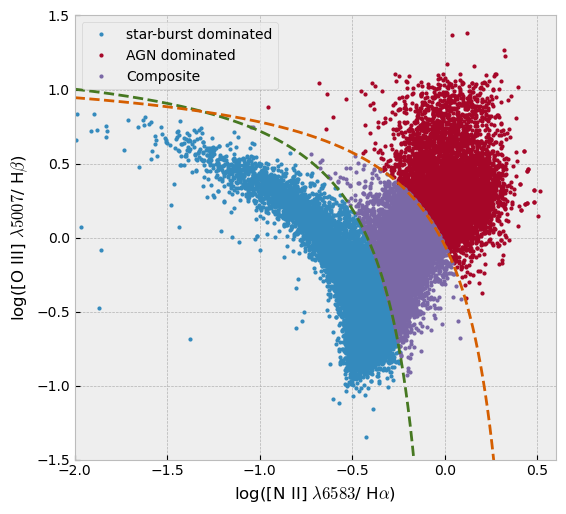

In [68]:
plot_bpt_OIII_NII(data, 'BPT_allbins.png')

## Task 1b
This part of the task was about understanding the evolution of the BPT diagram with cosmic time. As we can see, the higher the redshift, the less objects we have, which is very intuitive. The next plot is a histogram where we can see the evolution of the ratio of AGN objects to all objects with redshift.

In [69]:
bins = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35]
data['bin'] = pd.cut(data['redshift'], bins)
group = data.groupby('bin')
data_binned = [group.get_group(x) for x in group.groups]

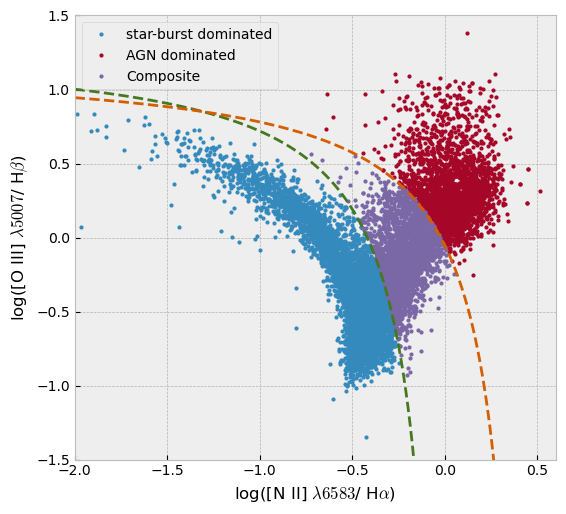

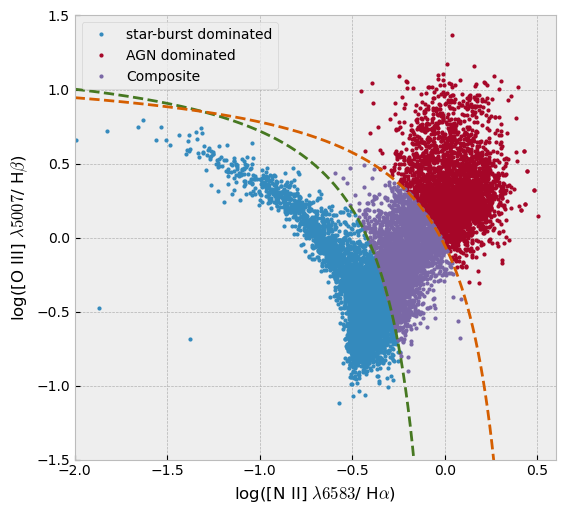

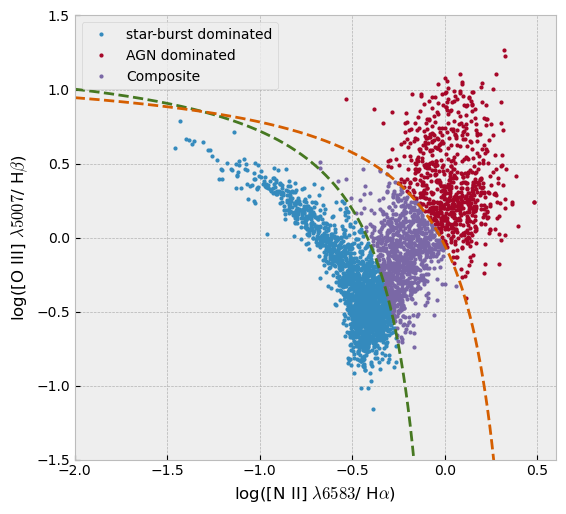

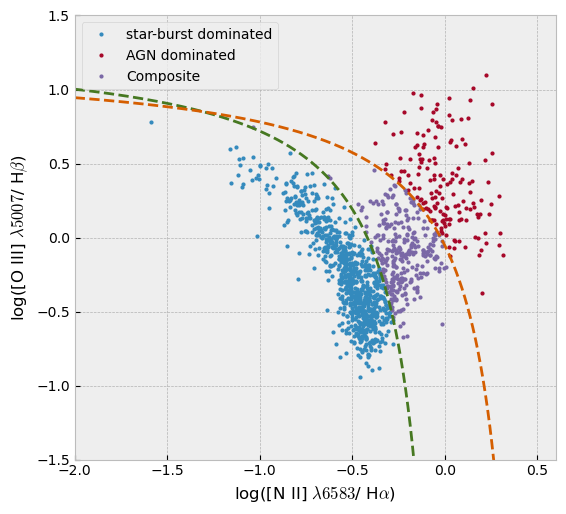

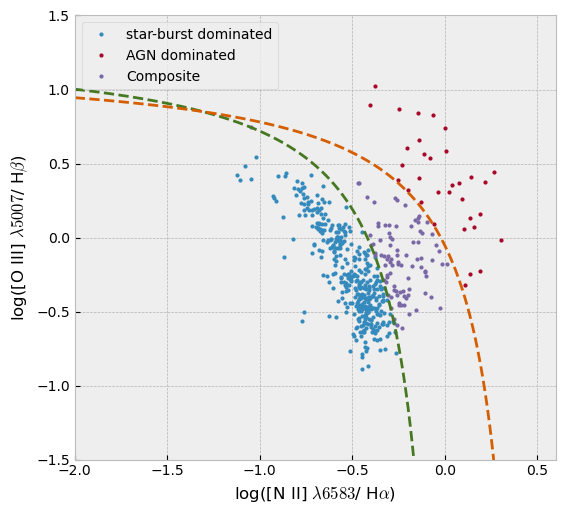

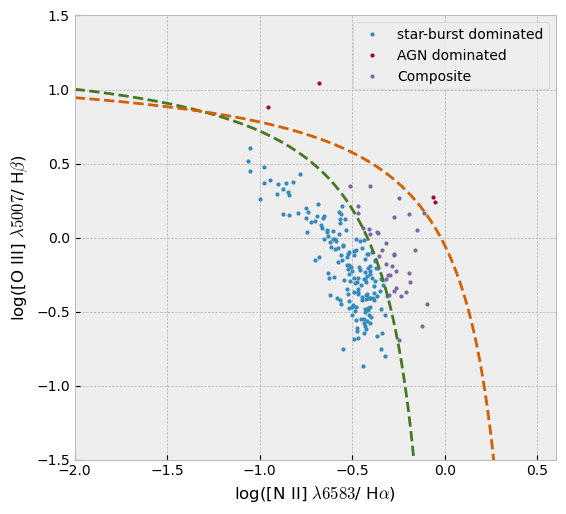

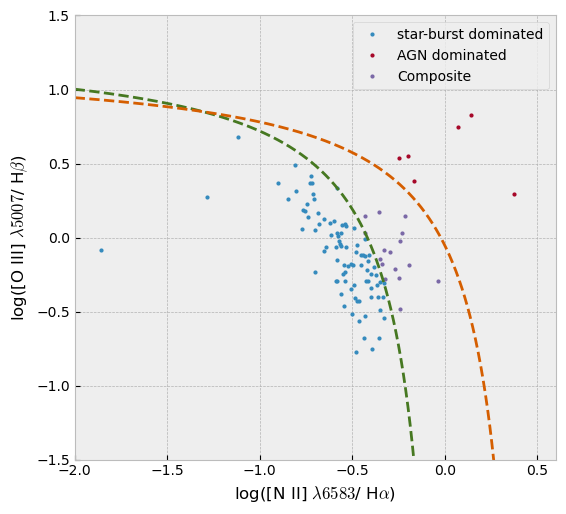

In [70]:
agn = []
tot = []
for i in range(len(data_binned)):
    plot_bpt_OIII_NII(data_binned[i], 'BPT-'+str(i)+'.png')
    agn.append(cathegorise(data_binned[i])[0].shape[0]) 
    tot.append(data_binned[i].shape[0])

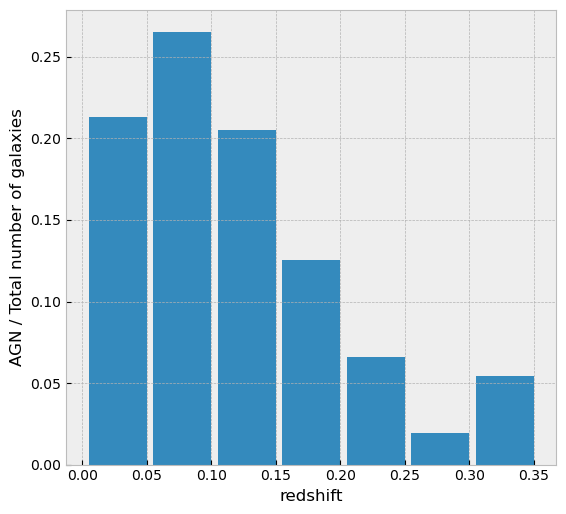

In [71]:
ratio = np.array(agn) / np.array(tot)
plt.bar(bins[1:], ratio, width = -0.045, align = 'edge')
plt.xlabel('redshift')
plt.ylabel('AGN / Total number of galaxies')
plt.show()

## Task 1c

Both of these plots reproduce a very close to the original separation between SFGs and AGN. The composite objects are right in the middle and can't be easily distinguished

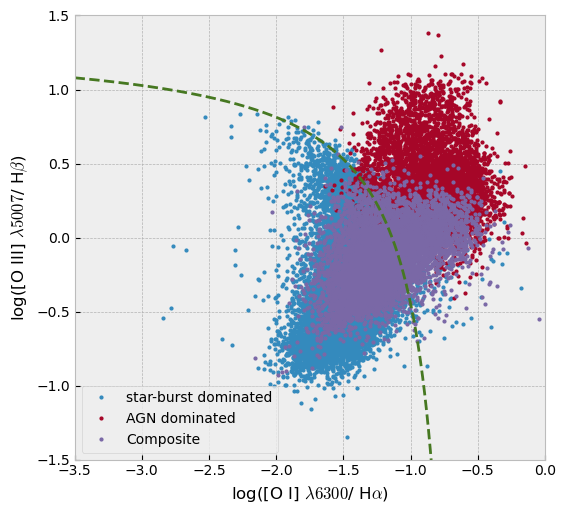

In [72]:
plot_bpt_OIII_OI(data, 'oiii_oi.png')

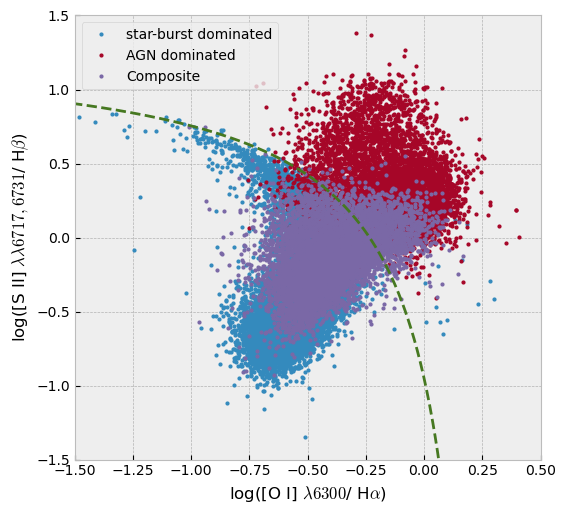

In [73]:
plot_bpt_OIII_SII(data, 'oiii_sii.png')

## Task 1d

A WHAN plot where we can see the separation line between Seyferts and LINERS. The separation between SFGs and AGN produces very similar results to our BPT diagrams. 

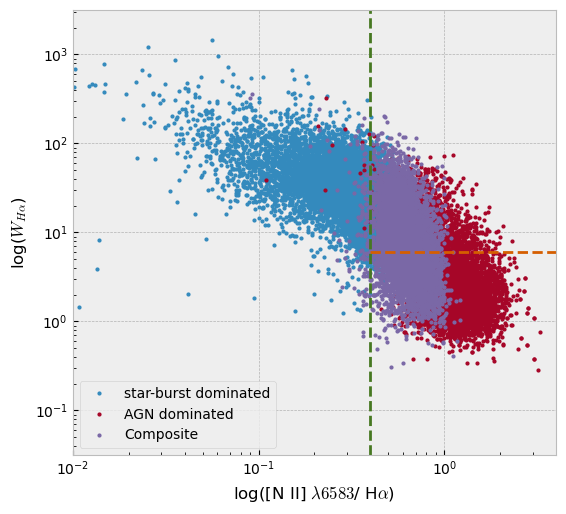

In [74]:
plot_WHAN(data, 'WHAN.png')

In [75]:
ratio_bpt = cathegorise(data)[0].shape[0]/ data.shape[0]

whan_agn = pd.concat([data[data['[NII] 6583 flux'] / data['Halpha flux'] > -0.40], data[np.abs(data['H alpha eqw']) > 6]])
whan_agn = whan_agn.drop_duplicates(keep = False)
ratio_whan = whan_agn.shape[0] / data.shape[0]

print('Ratio of AGN to all objects from BPT diagram: ' + str(ratio_bpt))
print('Ratio of AGN to all objects from WHAN diagram: ' + str(ratio_whan))

Ratio of AGN to all objects from BPT diagram: 0.2256
Ratio of AGN to all objects from WHAN diagram: 0.28253333333333336


# Task 3

Here, a few WISE diagrams were plotted and compared to our results from the BPT classification. The first diagram uses a simple classification method from Jarrett et al. 2017

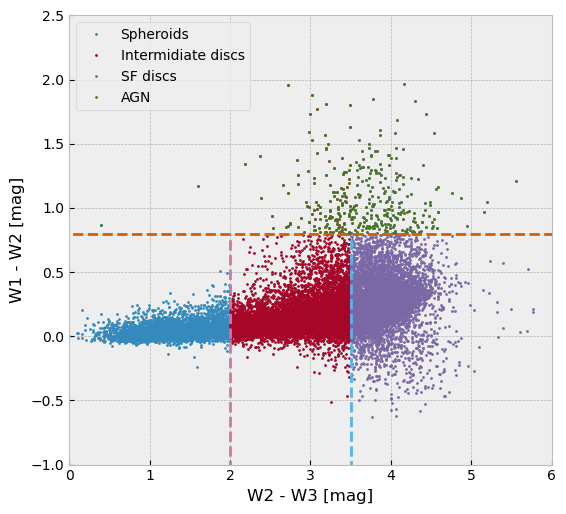

In [76]:
x_agn = np.linspace(np.min(data['W2 mag'] - data['W3 mag']), np.max(data['W2 mag'] - data['W3 mag']), 100)
y_agn = np.ones(100) * 0.8

y_morph =  np.linspace(np.min(data['W1 mag'] - data['W2 mag']), 0.8, 100)
x_sph = np.ones(100) * 2
x_disc = np.ones(100) * 3.5

spher = data[data['W2 mag'] - data['W3 mag'] < 2]
int_disc_ = data[data['W2 mag'] - data['W3 mag'] > 2]
int_disc = int_disc_[int_disc_['W2 mag'] - int_disc_['W3 mag'] < 3.5]
sf_disc = data[data['W2 mag'] - data['W3 mag'] > 3.5]
agn = data[data['W1 mag'] - data['W2 mag'] > 0.8]

#print(agn)

plt.plot(spher['W2 mag'] - spher['W3 mag'], spher['W1 mag'] - spher['W2 mag'],'o', markersize=1, label = 'Spheroids')
plt.plot(int_disc['W2 mag'] - int_disc['W3 mag'], int_disc['W1 mag'] - int_disc['W2 mag'],'o', markersize=1, label = 'Intermidiate discs')
plt.plot(sf_disc['W2 mag'] - sf_disc['W3 mag'], sf_disc['W1 mag'] - sf_disc['W2 mag'],'o', markersize=1, label = 'SF discs')
plt.plot(agn['W2 mag'] - agn['W3 mag'], agn['W1 mag'] - agn['W2 mag'], 'o', markersize=1, label = 'AGN')

plt.plot(x_agn, y_agn, '--')
plt.plot(x_sph, y_morph,'--')
plt.plot(x_disc, y_morph, '--')
plt.xlabel(r'W2 - W3 [mag]')
plt.ylabel(r'W1 - W2 [mag]')
plt.ylim(-1,2.5)
plt.xlim(0,6)
plt.legend()
plt.savefig('WISE_colors.png', dpi = 300)
plt.show()


Here we plot the color-color WISE diagram and apply the selection criteria from Mateos et al. (2012, 2013). Just from simple visual inspection it seems like the wedge that separates AGN from other objects also includes a few objects around W1-W2 = 0, which is unexpected. The magnitude values from the WISE catalogue were taken as they are background subracted in contrast to the flux values which were raw fluxes in "Digital number" units but maybe soemadditional correction is needed to produce the best results.  

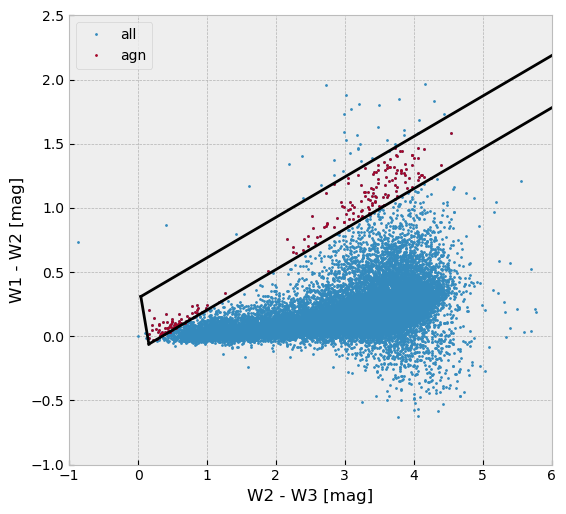

Ratio of AGN to all objects: 0.007366666666666666


In [77]:
agn = pd.concat([data, data[(data['W1 mag'] - data['W2 mag']) <  (data['W2 mag'] - data['W3 mag']) * 0.315 - 0.110],\
                 data[(data['W1 mag'] - data['W2 mag']) >  (data['W2 mag'] - data['W3 mag']) * 0.315 + 0.297],\
                 data[(data['W1 mag'] - data['W2 mag']) <  (data['W2 mag'] - data['W3 mag']) * -3.172 + 0.436]])
agn = agn.drop_duplicates(keep=False)


x_top = np.linspace(0.0398, np.max(data['W2 mag'] - data['W3 mag']), 100)
x_bot = np.linspace(0.1566, np.max(data['W2 mag'] - data['W3 mag']), 100)
x_mir = np.linspace(0.0398, 0.1566, 100)
y_top = x_top * 0.315 + 0.297 
y_bot = x_bot * 0.315 - 0.110
y_mir = -3.172 * x_mir + 0.436

plt.plot(data['W2 mag'] - data['W3 mag'], data['W1 mag'] - data['W2 mag'],'o', markersize=1, label = 'all')
plt.plot(agn['W2 mag'] - agn['W3 mag'], agn['W1 mag'] - agn['W2 mag'],'o', markersize=1, label = 'agn')
plt.plot(x_top, y_top, '-', color = 'black')
plt.plot(x_bot, y_bot, '-', color = 'black')
plt.plot(x_mir, y_mir, '-', color = 'black')
plt.xlabel(r'W2 - W3 [mag]')
plt.ylabel(r'W1 - W2 [mag]')
plt.ylim(-1,2.5)
plt.xlim(-1,6)
plt.legend()
plt.show()

print('Ratio of AGN to all objects: ' + str(agn.shape[0]/data.shape[0]))

In [78]:
agn_both = pd.merge(agn, cathegorise(data)[0], on=['plate', 'mjd', 'fiberid'])
print('Number of AGN objects in SDSS (BPT method): ' + str(cathegorise(data)[0].shape[0]))
print('Number of AGN objects in WISE survey (Mateos et al. (2012, 2013)): ' + str(agn.shape[0]))
print('Number of AGN objects after cross matching both methods: ' + str(agn_both.shape[0]))
#agn_both

Number of AGN objects in SDSS (BPT method): 6768
Number of AGN objects in WISE survey (Mateos et al. (2012, 2013)): 221
Number of AGN objects after cross matching both methods: 114


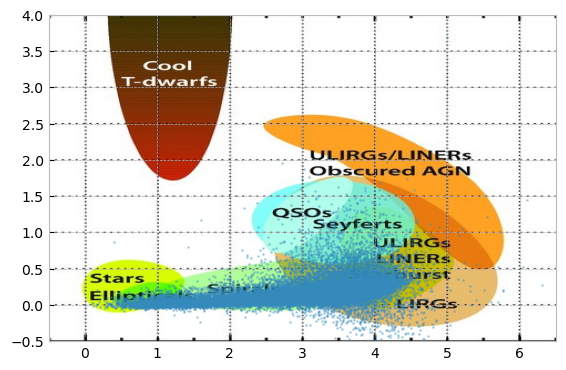

In [79]:
plt.rcParams["figure.figsize"] = [5.76, 5.24]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("WISE_original.jpg")
fig, ax = plt.subplots()
im = ax.imshow(im, zorder=0, extent=[-1, 7, -0.5, 4])
ax.plot(data['W2 mag'] - data['W3 mag'], data['W1 mag'] - data['W2 mag'],'o', markersize=1, label = 'all', alpha = 0.3)
plt.ylim(-0.5,4)
plt.xlim(-0.5,6.5)
plt.show()

# Task 4

In [21]:
import QNPy #Importing the package

from QNPy import Preprocess as pr #Importing Preprocess module from the package
from QNPy.Preprocess import transform #importing the funcion transform for transformation the data
from QNPy.Preprocess import * #importing all external packages from Preprocess

In [22]:
path = './lc_new' #path to data
csv_files = glob.glob(path + "/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)
data_lc = pd.concat(df_list, ignore_index=True)

### Here we print out some information about every lightcurve. The method used to evaluate the gaps in the data is the following:
1. We calculate the difference in MJD between every 2 consecutive data points
2. We calculate the median difference and the standard deviation of the difference between points
3. We take as a 'gap' in data every period lasing more than $3 \times \sigma$ of the difference
4. We print out the duration of every gap in the data

In [23]:
for file in csv_files:
    print(file)
    lc = pd.read_csv(file)
#Here we find the gaps in the light curve and calculate their durations
    diff = []
    for i in range(1, len(lc['mjd'])):
        diff.append(lc['mjd'][i] - lc['mjd'][i-1])
    med_dif = np.median(diff)
    std_dif = np.std(diff)
    gaps = []
    for i in diff:
        if abs(i - med_dif) > 3 * std_dif: gaps.append(i)

    print('Gaps in light curve and their durations in MJD: ' + str(["{0:0.2f}".format(i) for i in gaps]))
    print('Number of data points: ' + str("{0:0.2f}".format(lc.shape[0])))
    print('Minimal magnitude: ' + str("{0:0.2f}".format(np.min(lc['mag']))))
    print('Median magnitude: ' + str("{0:0.2f}".format(np.median(lc['mag']))))
    print('Maximum amplitude: ' + str("{0:0.2f}".format(np.max(lc['mag'] - np.min(lc['mag'])))))

./lc_new\2473812.csv
Gaps in light curve and their durations in MJD: ['736.99', '296.16', '323.07', '299.14', '297.12', '270.08', '278.10']
Number of data points: 138.00
Minimal magnitude: 17.61
Median magnitude: 18.01
Maximum amplitude: 0.48
./lc_new\2524327.csv
Gaps in light curve and their durations in MJD: ['742.97', '295.22', '323.13', '299.14', '271.09', '282.08']
Number of data points: 135.00
Minimal magnitude: 18.42
Median magnitude: 18.55
Maximum amplitude: 0.31
./lc_new\2579983.csv
Gaps in light curve and their durations in MJD: ['742.97', '296.16', '323.07', '299.14', '270.09', '278.10']
Number of data points: 137.00
Minimal magnitude: 18.63
Median magnitude: 18.97
Maximum amplitude: 0.61
./lc_new\3032591.csv
Gaps in light curve and their durations in MJD: ['736.99', '296.16', '263.27', '323.07', '307.13', '265.24', '270.09', '278.10']
Number of data points: 140.00
Minimal magnitude: 18.44
Median magnitude: 18.64
Maximum amplitude: 0.30
./lc_new\3078106.csv
Gaps in light cur

## After this, we carefully follow the QNPy tutorial

In [24]:
input_folder = './lc_new'
output_folder = './light_curves_clean'
threshold_aggregation = 5
threshold_outliers = 3.0

outliers=pr.clean_save_aggregate_data(input_folder, output_folder, threshold_aggregation, threshold_outliers)

Cleaned and saved 2473812.csv to ./light_curves_clean\2473812.csv
Cleaned and saved 2524327.csv to ./light_curves_clean\2524327.csv
Cleaned and saved 2579983.csv to ./light_curves_clean\2579983.csv
Cleaned and saved 3032591.csv to ./light_curves_clean\3032591.csv
Cleaned and saved 3078106.csv to ./light_curves_clean\3078106.csv
Cleaned and saved 3097526.csv to ./light_curves_clean\3097526.csv
Cleaned and saved 3102202.csv to ./light_curves_clean\3102202.csv
Cleaned and saved 3104329.csv to ./light_curves_clean\3104329.csv
Cleaned and saved 3152786.csv to ./light_curves_clean\3152786.csv
Cleaned and saved 3844725.csv to ./light_curves_clean\3844725.csv
Processing completed.


In [25]:
padding= pr.backward_pad_curves('./lc_new', './Padded_lc', desired_observations=100)

Created new file: ./Padded_lc\2473812.csv
Created new file: ./Padded_lc\2524327.csv
Created new file: ./Padded_lc\2579983.csv
Created new file: ./Padded_lc\3032591.csv
Created new file: ./Padded_lc\3078106.csv
Created new file: ./Padded_lc\3097526.csv
Created new file: ./Padded_lc\3102202.csv
Created new file: ./Padded_lc\3104329.csv
Created new file: ./Padded_lc\3152786.csv
Created new file: ./Padded_lc\3844725.csv


In [26]:
#Path to Padded Data
DATA_SRC = "./Padded_lc" 
#path to folder to save preproc data (transformed data) + errors
DATA_DST = "./preproc" 

files = os.listdir(DATA_SRC) 

number_of_points, trcoeff = pr.transform_and_save(files, DATA_SRC, DATA_DST, transform)

In [27]:
from QNPy import SPLITTING_AND_TRAINING as st #Importing SPLITTING_AND_TRAINING module from the package
from QNPy.SPLITTING_AND_TRAINING import * #Importing all packages from SPLITTING_AND_TRAINING module

In [28]:
DATA_SRC = "./preproc" #Path to transformed data

files = os.listdir(DATA_SRC) #listing the transformed data

#creating the folders for saving the splitted data
st.create_split_folders(train_folder='./dataset/train/', test_folder='./dataset/test/', val_folder='./dataset/val/')

#path to TRAIN, TEST and VAL folders where your splitted data will be saved. 
#You can directly enter this informations in split_data function
TRAIN_FOLDER = './dataset/train/'
TEST_FOLDER = './dataset/test/'
VAL_FOLDER = './dataset/val/'

In [29]:
st.split_data(files, DATA_SRC, TRAIN_FOLDER, TEST_FOLDER, VAL_FOLDER) 

100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 208.89it/s]


In [30]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder

MODEL_PATH = "./output/cnp_model.pth" #path for saving model

BATCH_SIZE=32 #Defining the batch size, it should remain 32

trainLoader, valLoader = st.get_data_loaders(DATA_PATH_TRAIN, DATA_PATH_VAL, BATCH_SIZE) 

#defining the device for testing, it can be CPU of CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
device

device(type='cpu')

In [31]:
model, optimizer, criterion, mseMetric, maeMetric = st.create_model_and_optimizer(device) 

history_loss_train, history_loss_val, \
history_mse_train, history_mse_val, \
history_mae_train, history_mae_val, \
epoch_counter_train_loss, epoch_counter_train_mse, \
epoch_counter_train_mae, epoch_counter_val_loss, \
epoch_counter_val_mse, epoch_counter_val_mae = st.train_model(
    model, trainLoader, valLoader, criterion, optimizer, 1, 1000, 500, mseMetric, maeMetric, device)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:00<00:00,  4.16it/s]


In [32]:
file_names = ["history_loss_train.csv", "history_loss_val.csv", "history_mse_train.csv", "history_mse_val.csv",
              "history_mae_train.csv", "history_mae_val.csv", "epoch_counter_train_loss.csv",
              "epoch_counter_train_mse.csv", "epoch_counter_train_mae.csv", "epoch_counter_val_loss.csv",
              "epoch_counter_val_mse.csv", "epoch_counter_val_mae.csv"]

# Define the lists
lists = [history_loss_train, history_loss_val, history_mse_train, history_mse_val, history_mae_train,
         history_mae_val, epoch_counter_train_loss, epoch_counter_train_mse, epoch_counter_train_mae,
         epoch_counter_val_loss, epoch_counter_val_mse, epoch_counter_val_mae]

save_list= st.save_lists_to_csv(file_names, lists)
# Replace with the path to your history_loss_train CSV file
history_loss_train_file = './history_loss_train.csv'  
# Replace with the path to your history_loss_val CSV file
history_loss_val_file = './history_loss_val.csv'  
# Replace with the path to your epoch_counter_train_loss CSV file
epoch_counter_train_loss_file = './epoch_counter_train_loss.csv'  

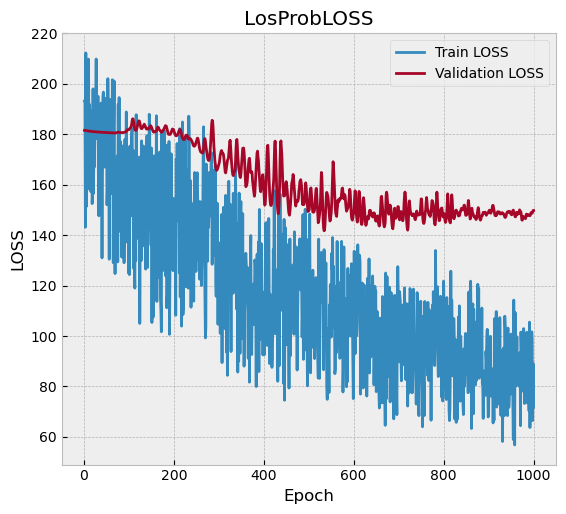

In [33]:
#plotting the Logprobloss after training
logprobloss=st.plot_loss(history_loss_train_file, history_loss_val_file, epoch_counter_train_loss_file)

In [34]:
history_mse_train_file = './history_mse_train.csv'
history_mse_val_file = './history_mse_val.csv'  
epoch_counter_train_mse_file = './epoch_counter_train_mse.csv'  

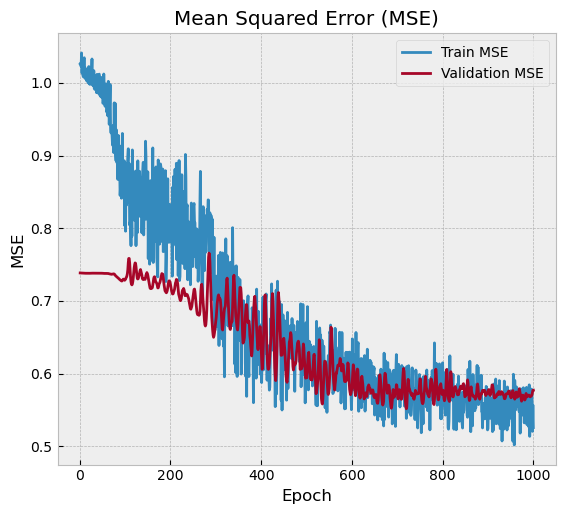

In [35]:
#plotting the MSE metric after training
msemetric=st.plot_mse(history_mse_train_file, history_mse_val_file, epoch_counter_train_mse_file)

In [36]:
history_mae_train_file = './history_mae_train.csv'
history_mae_val_file = './history_mae_val.csv'  
epoch_counter_train_mae_file = './epoch_counter_train_mae.csv'  

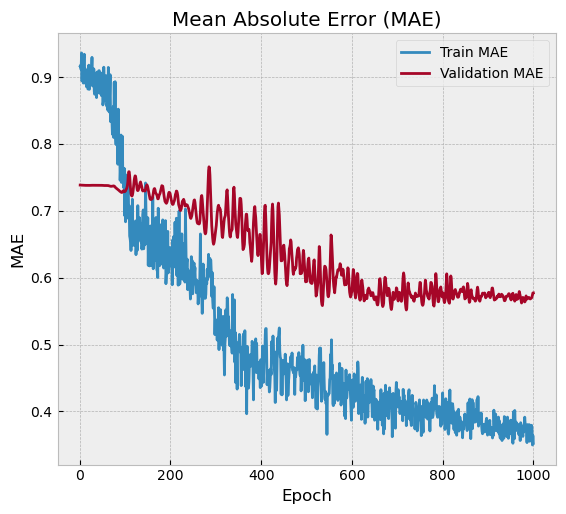

In [37]:
#plotting the MAE metric after training
maemetric=st.plot_mae(history_mae_train_file, history_mae_val_file, epoch_counter_train_mae_file)

In [38]:
save = st.save_model(model, MODEL_PATH) #saving the trained model

In [39]:
from QNPy import PREDICTION_Original_mjd as por
from QNPy.PREDICTION_Original_mjd import * 
from QNPy.PREDICTION_Original_mjd import plot_function2, back_x, back_y, find_LC_transform 

In [40]:
por.create_prediction_folders()

Folder already exists: ./output/predictions\train
Folder already exists: ./output/predictions\train\plots
Folder already exists: ./output/predictions\train\data
Folder already exists: ./output/predictions\test
Folder already exists: ./output/predictions\test\plots
Folder already exists: ./output/predictions\test\data
Folder already exists: ./output/predictions\val
Folder already exists: ./output/predictions\val\plots
Folder already exists: ./output/predictions\val\data


In [41]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder
DATA_PATH_TEST="./dataset/test" #path to test folder
OUTPUT_PATH = "./output/predictions/" #path where to save the plots and data

MODEL_PATH = "./output/cnp_model.pth" #path to saved model

In [42]:
model = por.load_trained_model(MODEL_PATH, device)#loading model

criterion, mseMetric=por.get_criteria()#loading criterion and metrics

folder_path = "./dataset/test" 
por.remove_padded_values_and_filter(folder_path)

folder_path = "./dataset/train"
por.remove_padded_values_and_filter(folder_path)

folder_path = "./dataset/val" 
por.remove_padded_values_and_filter(folder_path)

Deleted file with 'minus' or 'plus' in the name: 2473812_minus_split0.csv
Deleted file with 'minus' or 'plus' in the name: 3102202_minus_split18.csv
Removed padding in file: 3104329_original_split22.csv
Removed padding in file: 2473812_original_split1.csv
Deleted file with 'minus' or 'plus' in the name: 2473812_plus_split2.csv
Deleted file with 'minus' or 'plus' in the name: 2524327_minus_split3.csv
Removed padding in file: 2524327_original_split4.csv
Deleted file with 'minus' or 'plus' in the name: 2524327_plus_split5.csv
Deleted file with 'minus' or 'plus' in the name: 2579983_minus_split6.csv
Removed padding in file: 2579983_original_split7.csv
Deleted file with 'minus' or 'plus' in the name: 2579983_plus_split8.csv
Deleted file with 'minus' or 'plus' in the name: 3032591_minus_split9.csv
Deleted file with 'minus' or 'plus' in the name: 3032591_plus_split11.csv
Deleted file with 'minus' or 'plus' in the name: 3078106_minus_split12.csv
Removed padding in file: 3078106_original_split1

In [43]:
tr = por.load_trcoeff()
testLoader = por.load_test_data(DATA_PATH_TEST)
trainLoader = por.load_train_data(DATA_PATH_TRAIN)
valLoader = por.load_val_data(DATA_PATH_VAL)

In [44]:
#prediction and ploting of test data
testMetrics=por.plot_test_data(model, testLoader, criterion, mseMetric, plot_function2, device, tr)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92it/s]

./output/predictions/test\plots\3104329_original_split22.png


<Figure size 576x524 with 0 Axes>

In [45]:
savetest=por.save_test_metrics(OUTPUT_PATH, testMetrics)#saving test metrics

In [46]:
#prediction adn plotting the train data
trainMetrics=por.plot_train_light_curves(trainLoader, model, criterion, mseMetric, plot_function2, device,tr)

 20%|████████████████▊                                                                   | 1/5 [00:00<00:02,  1.75it/s]

./output/predictions/train\plots\2473812_original_split1.png


 40%|█████████████████████████████████▌                                                  | 2/5 [00:01<00:02,  1.50it/s]

./output/predictions/train\plots\2579983_original_split7.png


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:01<00:01,  1.65it/s]

./output/predictions/train\plots\2524327_original_split4.png


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:02<00:00,  1.79it/s]

./output/predictions/train\plots\3152786_original_split25.png


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.76it/s]

./output/predictions/train\plots\3078106_original_split13.png


<Figure size 576x524 with 0 Axes>

In [47]:
savetrain=por.save_train_metrics(OUTPUT_PATH, trainMetrics)#saving train metrics

In [48]:
#prediction and plotting val data
valMetrics=por.plot_val_curves(model, valLoader, criterion, mseMetric, plot_function2, device,tr)

 25%|█████████████████████                                                               | 1/4 [00:00<00:01,  2.16it/s]

./output/predictions/val\plots\3032591_original_split10.png


 50%|██████████████████████████████████████████                                          | 2/4 [00:00<00:00,  2.02it/s]

./output/predictions/val\plots\3097526_original_split16.png


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:01<00:00,  2.09it/s]

./output/predictions/val\plots\3102202_original_split19.png


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.11it/s]

./output/predictions/val\plots\3844725_original_split28.png


<Figure size 576x524 with 0 Axes>

In [49]:
saveval=por.save_val_metrics(OUTPUT_PATH, valMetrics)#saving validation metrics

### A very quick plot of the test results. As we can see, the results are less than ideal, especially at the beginnig of the plot where we have both a big variability amplitude and a significant gap in the data.

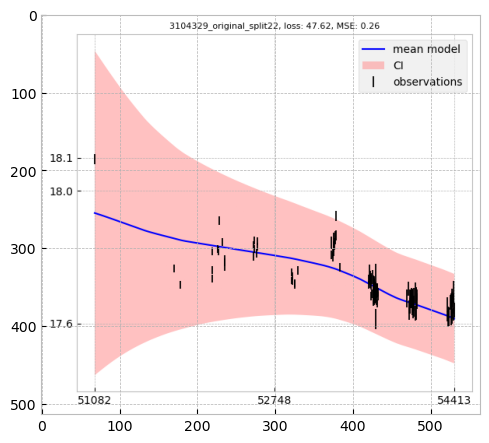

In [50]:
plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("./output/predictions/test/plots/3104329_original_split22.png")
plt.imshow(im)